# Data mining

Quy trình các bước khai phá dữ liệu

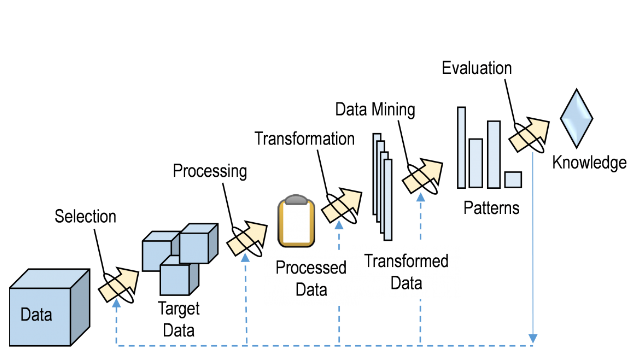

# Data Selection

In [25]:
import torch 
import torch.nn as nn
from torch.optim import SGD
from torch.utils.data import DataLoader, Dataset
import pandas as pd
import numpy as np



In [11]:
df = pd.read_csv('houseprice_dataset.csv')
df

,Mô tả,Diện tích,Vị trí,Ngày đăng,Người đăng,Đường link,Giá phòng
0,CHO THUÊ CCMN FULL ĐỒ MỚI GẦN NGAY ĐẠI HỌC CÔN...,25m²,"Quận Bắc Từ Liêm, Hà Nội","Thứ 6, 14:31 01/03/2024",Kim Cúc,https://phongtro123.com/cho-thue-ccmn-full-do-...,3.5 triệu/tháng
1,CHO THUÊ CHUNG CƯ MINI HAI BÀ TRƯNG,20m²,"Quận Hai Bà Trưng, Hà Nội","Thứ 7, 06:47 02/03/2024",Phạm Viết Hoàng,https://phongtro123.com/giam-soc-1tr-cho-2-tha...,4 triệu/tháng
2,CHO THUÊ PHÒNG TRỌ RỘNG RÃI TRONG CHUNG CƯ MIN...,25m²,"Quận Thanh Xuân, Hà Nội","Thứ 6, 13:48 01/03/2024",Mai Thi Thành,https://phongtro123.com/cho-thue-phong-tro-nhu...,3 triệu/tháng
3,THUÊ PHÒNG TRỌ TÔN THÂT TÙNG 2TR5/ THÁNG - TẦNG 4,30m²,"Quận Đống Đa, Hà Nội","Thứ 5, 15:03 29/02/2024",Huy,https://phongtro123.com/thue-phong-tro-ton-tha...,2.5 triệu/tháng
4,"CCMN PHÒNG TRỌ BKX TRẦN ĐẠI NGHĨA, NGUYỄN AN N...",35m²,"Quận Hoàng Mai, Hà Nội","Thứ 3, 15:18 27/02/2024",Quang,https://phongtro123.com/ccmn-phong-tro-tran-da...,4.3 triệu/tháng
...,...,...,...,...,...,...,...
5795,Mình cho thuê 1 phòng trong nhà 4 tầng mới xây...,22m²,"Quận Hai Bà Trưng, Hà Nội","Chủ Nhật, 08:39 03/05/2015",NaN,https://phongtro123.com/tinh-thanh/ha-noi/minh...,2.5 triệu/tháng
5796,Cho thuê phòng trọ khép kín cạnh sân vận động ...,14m²,"Quận Nam Từ Liêm, Hà Nội","Chủ Nhật, 08:38 03/05/2015",NaN,https://phongtro123.com/tinh-thanh/ha-noi/cho-...,1.2 triệu/tháng
5797,Cho thuê phòng tại Hoàng Hoa Thám - Ba Đình,15m²,"Quận Ba Đình, Hà Nội","Chủ Nhật, 08:37 03/05/2015",NaN,https://phongtro123.com/tinh-thanh/ha-noi/cho-...,1.3 triệu/tháng
5798,"Cho thuê phòng gấp Trần Cung, Hà Nội",15m²,"Quận Nam Từ Liêm, Hà Nội","Chủ Nhật, 08:34 03/05/2015",NaN,https://phongtro123.com/tinh-thanh/ha-noi/cho-...,1.6 triệu/tháng


In [12]:
def DataCleaning(df):
    # Làm sạch thuộc tính Diện tích
    df['Diện tích'] = df['Diện tích'].str.replace('m²', '').str.replace('m2', '').str.replace('m', '')
    df['Diện tích'] = df['Diện tích'].apply(lambda x: str((float(x.split('-')[0]) + float(x.split('-')[1])) / 2) if '-' in x else x)
    df['Diện tích'] = df['Diện tích'].apply(lambda x: str((float(x.split('~')[0]) + float(x.split('~')[1])) / 2) if '~' in x else x)
    df = df[df['Diện tích'].str.len() <= 5]

    # Làm sạch thuộc tính Vị trí
    df['Vị trí'] = df['Vị trí'].str.replace(', Hà Nội', '').str.replace('Quận', '').str.replace('Huyện', '')

    # Làm sạch thuộc tính Ngày đăng
    df['Ngày đăng'] = df['Ngày đăng'].str[-11:].str.split('/')
    date = np.array(df['Ngày đăng'].tolist())
    df['Ngày'] = date[:, 0]
    df['Tháng'] = date[:, 1]
    df['Năm'] = date[:, 2]

    # Làm sạch thuộc tính Giá phòng
    df['Giá phòng'] = df['Giá phòng'].str.replace(' triệu/tháng', '')
    df['Giá phòng'] = df['Giá phòng'].apply(lambda x: float(x.replace('đồng/tháng', '')) * 0.001 if 'đồng/tháng' in x else x)

    df = df.drop(columns=['Mô tả', 'Người đăng', 'Đường link', 'Ngày đăng'])
    df = df[df['Giá phòng'] != 'Thỏa thuận']

    return df

# Chuyển dữ liệu từ boolean (True / False) sang nhị phân (0/1)
def DataStandard(data):
    df = pd.get_dummies(data)
    column_list = df.columns
    for column in column_list:
        df[column] = df[column].replace({False: 0, True: 1})
    return df


df = DataCleaning(df)
ds = DataStandard(df['Vị trí'])
df = pd.concat([df, ds], axis=1)
# Ép kiểu dữ liệu từ chữ sang số 
df = df.drop(columns=['Vị trí'])
df['Ngày'] = pd.to_numeric(df['Ngày'])
df['Tháng'] = pd.to_numeric(df['Tháng'])
df['Năm'] = pd.to_numeric(df['Năm'])
df['Diện tích'] = pd.to_numeric(df['Diện tích'])
df['Giá phòng'] = pd.to_numeric(df['Giá phòng'])
print(df.dtypes)
print(df)


Diện tích        float64
Giá phòng        float64
Ngày               int64
Tháng              int64
Năm                int64
 Ba Đình           int64
 Bắc Từ Liêm       int64
 Chương Mỹ         int64
 Cầu Giấy          int64
 Gia Lâm           int64
 Hai Bà Trưng      int64
 Hoài Đức          int64
 Hoàn Kiếm         int64
 Hoàng Mai         int64
 Hà Đông           int64
 Long Biên         int64
 Mê Linh           int64
 Nam Từ Liêm       int64
 Sóc Sơn           int64
 Thanh Trì         int64
 Thanh Xuân        int64
 Thường Tín        int64
 Thạch Thất        int64
 Tây Hồ            int64
 Đan Phượng        int64
 Đông Anh          int64
 Đống Đa           int64
dtype: object
      Diện tích  Giá phòng  Ngày  Tháng   Năm   Ba Đình   Bắc Từ Liêm  \
0          25.0        3.5     1      3  2024         0             1   
1          20.0        4.0     2      3  2024         0             0   
2          25.0        3.0     1      3  2024         0             0   
3          30.0    

C:\Users\huymo\AppData\Local\Temp\ipykernel_13868\1599344097.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vị trí'] = df['Vị trí'].str.replace(', Hà Nội', '').str.replace('Quận', '').str.replace('Huyện', '')
C:\Users\huymo\AppData\Local\Temp\ipykernel_13868\1599344097.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ngày đăng'] = df['Ngày đăng'].str[-11:].str.split('/')
C:\Users\huymo\AppData\Local\Temp\ipykernel_13868\1599344097.py:14: SettingWithCopyWarning: 
A value is trying to be set 

Tập dữ liệu sau khi được làm sạch

In [13]:
df

,Diện tích,Giá phòng,Ngày,Tháng,Năm,Ba Đình,Bắc Từ Liêm,Chương Mỹ,Cầu Giấy,Gia Lâm,...,Nam Từ Liêm,Sóc Sơn,Thanh Trì,Thanh Xuân,Thường Tín,Thạch Thất,Tây Hồ,Đan Phượng,Đông Anh,Đống Đa
0,25.0,3.5,1,3,2024,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20.0,4.0,2,3,2024,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,25.0,3.0,1,3,2024,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,30.0,2.5,29,2,2024,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,35.0,4.3,27,2,2024,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5795,22.0,2.5,3,5,2015,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5796,14.0,1.2,3,5,2015,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5797,15.0,1.3,3,5,2015,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5798,15.0,1.6,3,5,2015,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## Remove outlier

Ta sẽ loại bỏ các trường hợp ngoại biên (outlier)

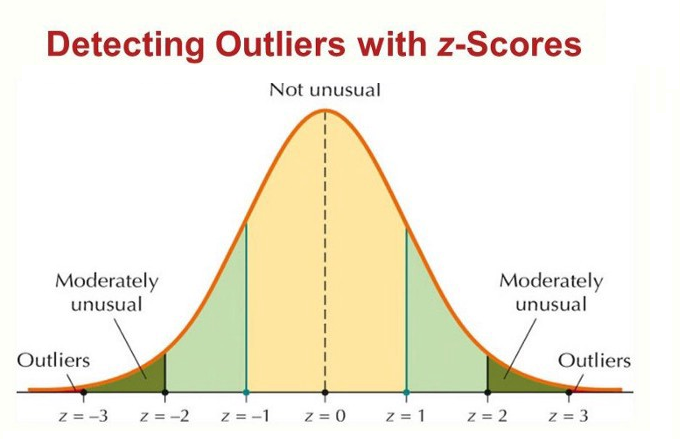

Sử dụng phương pháp Z-score , ta sẽ tính Z-score trên từng điểm dữ liệu, với những điểm có Z-score >3 hoặc Z-score < -3 thì đó được xem là nhiễu và ta sẽ loại bỏ chúng

Công thức tính z-score

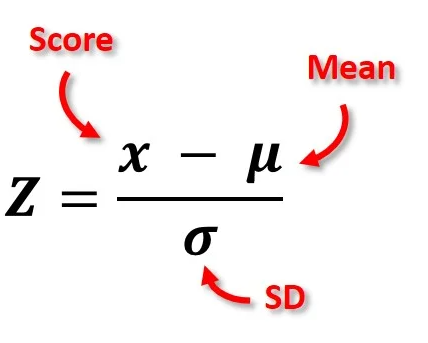

Text(0.5, 1.0, 'Mối tương quan giữ giá phòng và diện tích')

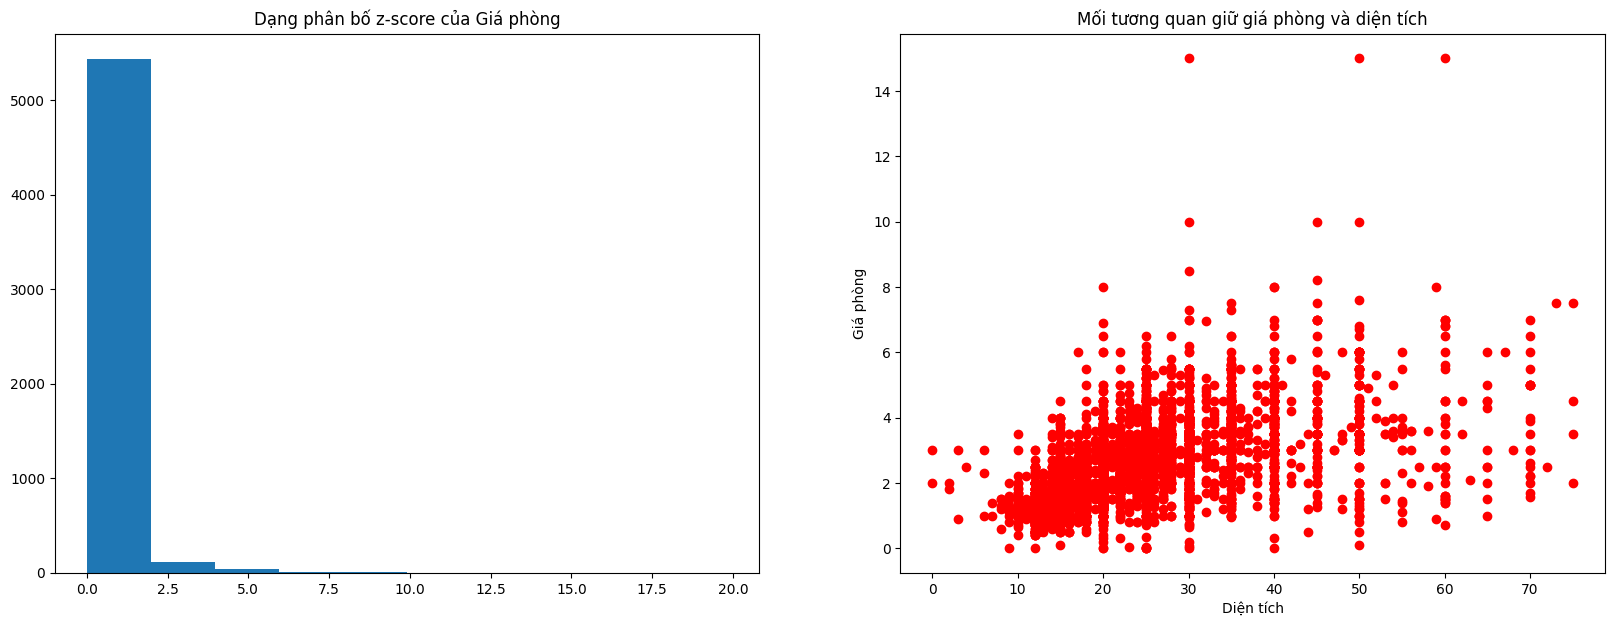

In [14]:
import matplotlib.pyplot as plt
def RemoveOutlier(data, threshold=3):
    z_scores = abs((data['Diện tích']-np.mean(data['Diện tích']))/np.std(data['Diện tích']))
    
    clean_data = data[z_scores<threshold]
    return clean_data, z_scores
def RemoveOutlier2(data, threshold=3):
    z_scores = abs((data['Giá phòng']-np.mean(data['Giá phòng']))/np.std(data['Giá phòng']))
    
    clean_data = data[z_scores<threshold]
    return clean_data, z_scores
df_clean, z_score = RemoveOutlier(df)
df_clean, _ = RemoveOutlier2(df_clean)
fig,ax = plt.subplots(nrows=1,ncols=2, figsize=(20,7))
ax[0].hist(z_score)
ax[0].set_title('Dạng phân bố z-score của Giá phòng')
ax[1].scatter(df_clean['Diện tích'],df_clean['Giá phòng'], color='red')
ax[1].set_xlabel('Diện tích')
ax[1].set_ylabel('Giá phòng')
ax[1].set_title('Mối tương quan giữ giá phòng và diện tích')

## mối tương quan giữa diện tích và giá phòng trước khi loại bỏ các điểm ngoại biên

Text(0.5, 1.0, 'mối tương quan giữa diện tích và giá phòng trước khi loại bỏ các điểm ngoại biên')

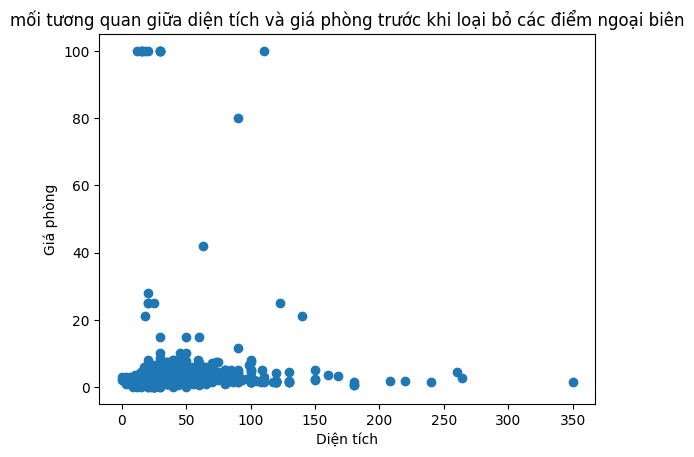

In [15]:
import matplotlib.pyplot as plt
x = df['Diện tích']
y = df['Giá phòng']
plt.scatter(x,y)
plt.xlabel('Diện tích')
plt.ylabel('Giá phòng')
plt.title('mối tương quan giữa diện tích và giá phòng trước khi loại bỏ các điểm ngoại biên')

(array([4.711e+03, 7.760e+02, 8.000e+01, 2.300e+01, 6.000e+00, 4.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([  0.,  35.,  70., 105., 140., 175., 210., 245., 280., 315., 350.]),
 <BarContainer object of 10 artists>)

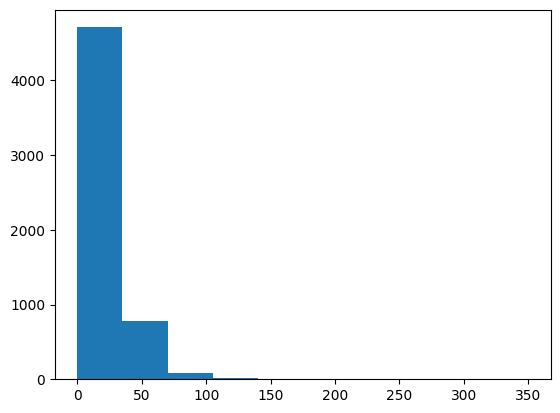

In [16]:
plt.hist(df['Diện tích'])

## Tập dữ liệu sau khi đã được làm sạch

In [17]:
df_clean

,Diện tích,Giá phòng,Ngày,Tháng,Năm,Ba Đình,Bắc Từ Liêm,Chương Mỹ,Cầu Giấy,Gia Lâm,...,Nam Từ Liêm,Sóc Sơn,Thanh Trì,Thanh Xuân,Thường Tín,Thạch Thất,Tây Hồ,Đan Phượng,Đông Anh,Đống Đa
0,25.0,3.5,1,3,2024,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20.0,4.0,2,3,2024,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,25.0,3.0,1,3,2024,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,30.0,2.5,29,2,2024,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,35.0,4.3,27,2,2024,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5795,22.0,2.5,3,5,2015,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5796,14.0,1.2,3,5,2015,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5797,15.0,1.3,3,5,2015,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5798,15.0,1.6,3,5,2015,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## Danh sách các thuộc tính

In [7]:
df_clean.columns

Index(['Diện tích', 'Giá phòng', 'Ngày', 'Tháng', 'Năm', ' Ba Đình',
       ' Bắc Từ Liêm', ' Chương Mỹ', ' Cầu Giấy', ' Gia Lâm', ' Hai Bà Trưng',
       ' Hoài Đức', ' Hoàn Kiếm', ' Hoàng Mai', ' Hà Đông', ' Long Biên',
       ' Mê Linh', ' Nam Từ Liêm', ' Sóc Sơn', ' Thanh Trì', ' Thanh Xuân',
       ' Thường Tín', ' Thạch Thất', ' Tây Hồ', ' Đan Phượng', ' Đông Anh',
       ' Đống Đa'],
      dtype='object')

In [18]:
df.to_csv('standard_dataset.csv', index=False)


# Bước 3: Data Transformation

## Standardization

Chuẩn hóa dữ liệu để đưa các thành phần (thuộc tính) về cùng một khoảng, tránh trường hợp tầm ảnh hưởng của các thuộc tính có giá trị lớn lấn áp các thuộc tính khác

In [19]:
from sklearn.preprocessing import MinMaxScaler
X = np.array(df_clean.drop(columns=['Giá phòng']))
y = np.array(df_clean['Giá phòng'])
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.33333333, 0.        , 0.18181818, ..., 0.        , 0.        ,
        0.        ],
       [0.26666667, 0.03333333, 0.18181818, ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.        , 0.18181818, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.2       , 0.06666667, 0.36363636, ..., 0.        , 0.        ,
        0.        ],
       [0.2       , 0.06666667, 0.36363636, ..., 0.        , 0.        ,
        0.        ],
       [0.26666667, 0.06666667, 0.36363636, ..., 0.        , 0.        ,
        0.        ]])

# Bước 5: Data Mining & Evaluation

Khai phá dữ liệu và Đánh gía

Sử dụng mô hình hồi quy tuyến tính để dự đoán giá nhà 

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE, r2_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=30)
model = LinearRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print('Giá nhà được dự đoán là:\n',y_predict)
mse = MSE(y_test,y_predict)
r2 = r2_score(y_test,y_predict)
print('Mean Square Error =', mse)
print('R-squared =',r2)


Giá nhà được dự đoán là:
 [4.19957733 2.26714325 1.92175293 ... 2.30023956 3.65744781 3.4147644 ]
Mean Square Error = 0.7374944079710264
R-squared = 0.3999845479471499


In [33]:
print(len(X_train[0]))

26


In [10]:
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [ 4.15618009e+00  3.68683232e-03  2.20261199e-02  1.20973684e+00
  7.46995563e-01  1.90247648e-01 -7.25743827e-01  8.15274568e-01
 -6.30857995e-01  4.27147890e-01 -5.98702129e-01  1.01833715e+00
  2.43729513e-01  2.40809523e-01  5.02500165e-02 -7.18324948e-01
  4.89602958e-01 -9.28533655e-01  1.96555794e-01  5.09428648e-01
 -1.65712640e+00  6.02082878e-01  5.47791267e-01 -5.92645355e-01
 -9.72644281e-01  7.46325172e-01]
Intercept: 0.16518236271644327


# Neural Network Regression

In [34]:
class NeuralNetworkRegression(nn.Module):
    def __init__(self):
        super(NeuralNetworkRegression, self).__init__()
        self.fc1 = nn.Linear(26, 16)
        self.fc3 = nn.Linear(16, 1)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
class HousePriceDataset(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
    def __len__(self):
        return len(self.X_data)
        

In [41]:
train_data = HousePriceDataset(torch.FloatTensor(X_train), torch.FloatTensor(y_train))
test_data = HousePriceDataset(torch.FloatTensor(X_test), torch.FloatTensor(y_test))
train_loader = DataLoader(dataset=train_data, batch_size=128, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=128, shuffle=False)
model = NeuralNetworkRegression()
criterion = nn.MSELoss()
device = "cuda" if torch.cuda.is_available() else "cpu"
optimizer = SGD(model.parameters(), lr=0.001)
for epoch in range(100):
    running_loss = 0
    num_samples = 0
    for batch_idx, (samples, labels) in enumerate(train_loader):

        samples = samples.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(samples.float())
        loss = criterion(outputs, labels.float().view(-1, 1))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        num_samples += len(samples)
    print(f'Epoch {epoch+1}, Loss: {running_loss/(batch_idx+1)}')



Epoch 1, Loss: 6.857376643589565
Epoch 2, Loss: 5.807810252053397
Epoch 3, Loss: 4.884482281548636
Epoch 4, Loss: 4.047000844138009
Epoch 5, Loss: 3.3405396938323975
Epoch 6, Loss: 2.745924036843436
Epoch 7, Loss: 2.30709457056863
Epoch 8, Loss: 1.948101246356964
Epoch 9, Loss: 1.7222087621688842
Epoch 10, Loss: 1.574779280594417
Epoch 11, Loss: 1.4964806505611965
Epoch 12, Loss: 1.4611273510115488
Epoch 13, Loss: 1.4259722590446473
Epoch 14, Loss: 1.410740750176566
Epoch 15, Loss: 1.40358179637364
Epoch 16, Loss: 1.3998212678091866
Epoch 17, Loss: 1.3918266245297024
Epoch 18, Loss: 1.3857423543930054
Epoch 19, Loss: 1.3920641234942845
Epoch 20, Loss: 1.3849814976964678
Epoch 21, Loss: 1.3982657858303615
Epoch 22, Loss: 1.3830208420753478
Epoch 23, Loss: 1.3813507522855486
Epoch 24, Loss: 1.3787445051329477
Epoch 25, Loss: 1.4028015511376517
Epoch 26, Loss: 1.370677273614066
Epoch 27, Loss: 1.381303594793592
Epoch 28, Loss: 1.3714745436395919
Epoch 29, Loss: 1.3675205503191268
Epoch 30

In [40]:
model.eval()
running_loss = 0
r2 = 0
with torch.no_grad():
    y_pred = []
    for batch_idx, (samples, labels) in enumerate(train_loader):
        samples = samples.to(device)
        labels = labels.to(device)
        outputs = model(samples.float())
        loss = MSE(outputs, labels.float().view(-1, 1))
        running_loss+=loss.item()
        r2 = r2_score(outputs, labels.float().view(-1, 1))
        r2+=r2
    print('Mean Square Error =', running_loss/(batch_idx+1))
    print('R-squared =', r2/(batch_idx+1))

Mean Square Error = 1.1168473039354596
R-squared = -0.34688931201619305
